# Clustering

Clustering 是屬於 Unsupervised learning 的一種，而 Unsupervised learning 算法是使用輸入向量從數據集推斷，而不參考已知或標記的結果

Clustering 最後會希望是群內彼此很相近，而群與群間則是盡可能的相異

分群與分類的差別在於，分類是在已知的類別（標記）下，替新的東西進行分類，分群則是在不知道資料類別（標記）的情況下，直接使用資料的特徵來進行分類

本次實作內容是：

- K-means

- DBSCAN

會使用到的套件

- numpy
- pandas 
- matplotlib
- sklearn
- mglearn

# K-means

K-means 是一種常用的分群演算法，其目標很簡單：將相似的數據點組合在一起並發現底層模式

為了要實現這一目標，K-means 會在數據集中查找固定數量（K）的聚類
 
K-means 算法識別 k 個質心，然後將每個數據點分配給最近的群，同時保持質心盡可能小。

k-means 是屬於**原型為基礎（prototype-based）**這一類的分群，這表示每一群是由一個原型來表示

特性是集群不會重疊，也不具有階層性，並假設每個群體中至少有一個樣本

K-means clustering 可以總結為四個步驟：

- 從樣本點中隨機挑選 k 個質心作為初始集群中心
- 指定每個樣本到它最近的質心
- 移動質心到被分配它的樣本點的中心
- 重複步驟 2 和 3 ，直到各群分配不再改變，或是達到所定義的**可容許誤差**，或是達到所定義的**最大迭代次數**

In [1]:
import mglearn

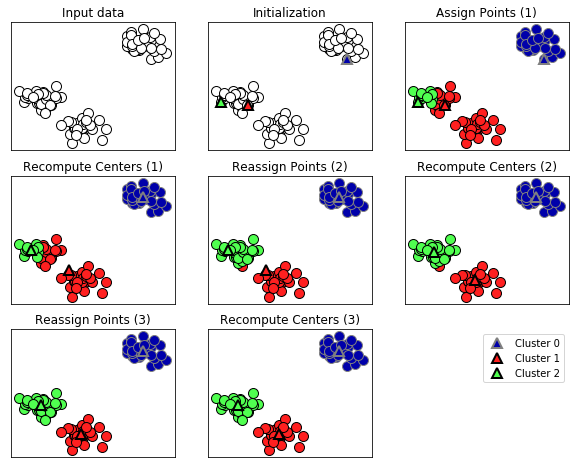

In [2]:
mglearn.plots.plot_kmeans_algorithm()

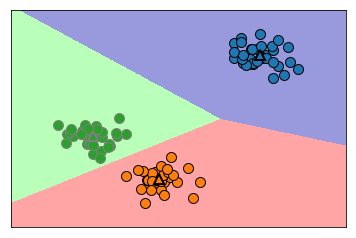

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
# 載入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
#  隨機產生 100 個資料點，並分成兩個群體，各別數量為 50 個
X = -2 * np.random.rand(100, 2)
X1 = 1 + 2 * np.random.rand(50, 2)
X[50:100, :] = X1

In [6]:
X[:10]

array([[-0.3800207 , -1.09951112],
       [-1.70725214, -0.93706187],
       [-0.20222459, -0.79337745],
       [-1.21705448, -0.36037506],
       [-1.48203821, -0.75196162],
       [-0.01986271, -1.89377281],
       [-1.19651038, -0.13818361],
       [-0.5765571 , -0.32338889],
       [-0.35852684, -1.40416835],
       [-0.59584106, -0.67733426]])

In [7]:
X[-10:]

array([[2.56585296, 2.7430704 ],
       [1.62705322, 2.78558087],
       [1.52734008, 1.19593064],
       [1.43916299, 2.11758986],
       [1.09899031, 2.06044538],
       [2.32889358, 1.52265984],
       [1.45748963, 1.83595371],
       [1.12153381, 1.09224488],
       [2.05185124, 1.35550572],
       [2.28770418, 1.33321784]])

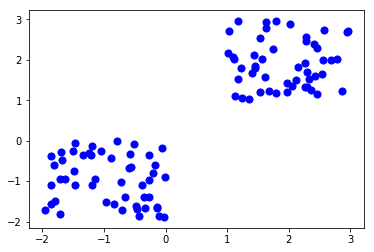

In [8]:
# 以圖形顯示各點的分佈
plt.scatter(X[ :, 0], X[ :, 1], s = 50, c = 'b')

plt.show()

In [9]:
# 使用 Scikit-learn 套件
from sklearn.cluster import KMeans

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

sklearn.cluster.KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True,n_jobs=1,algorithm=’auto’)

重要參數：
- n_clusters：表示分群的數量
- init：質心初始方式，參數有 'K-Means++'、'random'
- n_init：表示以獨立不同的、隨機選取執行，執行 k-means 演算法 10 次，並以最低 SSE 的模型，作爲最後的模型
- max_iter：每次執行的最大迭代次數（預設為 300）
- tol：可容許誤差（預設為 1e-04(0.0001)）   控制集群內誤差平方和的可容許誤差

屬性：

- cluster_centers_：產生集群的質心向量
- labels_：產生了每個資料點所屬的群的標記
- inertia_：產生每個資料點距離它最近的群中心的距離之和

方法：

- fit(X[,y])：訓練模型
- predict：預測資料點所屬的群
- fitpredict(X[,y])：訓練模型並預測每個資料點所在的群，等同於先使用fit，之後再用predict方法
- score(X[,y])：產生資料點距離一個群中心的偏移量的相反數

In [10]:
# K = 2 設定為兩群
Kmean = KMeans(n_clusters = 2, init = 'random')

In [11]:
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
# 檢視每群的中心點位置
Kmean.cluster_centers_

array([[-0.91668097, -0.95724549],
       [ 1.92126433,  1.90492194]])

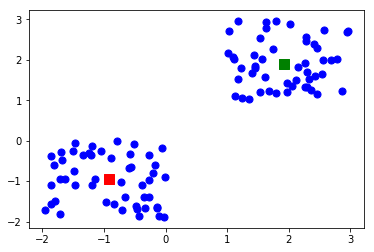

In [19]:
# 將中心點繪製於圖上
plt.scatter(X[:, 0],X[:, 1], s = 50, c = 'b')
plt.scatter(1.92126433,  1.90492194, s = 100, c = 'g', marker = 's')
plt.scatter(Kmean.cluster_centers_[0][0], Kmean.cluster_centers_[0][1], s = 100, c = 'r', marker = 's')

plt.show()

In [20]:
# 取得 K-means 對於數據集 labels 的屬性
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [25]:
# 使用新資料來進行預測
sample_test = np.array([3.0, 2.0])
second_test = sample_test.reshape(1, -1)
second_test

array([[3., 2.]])

In [26]:
Kmean.predict(second_test)

array([1], dtype=int32)

# 練習

以下為隨機產生四組的資料，請用 k-mean 演算法將之分群

In [17]:
from sklearn.datasets.samples_generator import make_blobs

In [18]:
X_1, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)

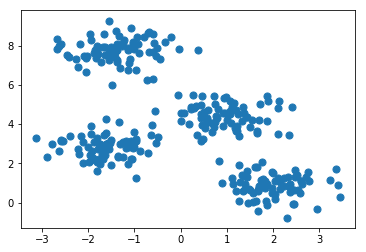

In [19]:
plt.scatter(X_1[:, 0], X_1[:, 1], s = 50)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
"""
Your Code Here
"""


利用著色標籤資料來視覺化，並標出被 k-means 評估器所決定出的群組中心

In [ ]:
plt.scatter(X_1[:, 0], X_1[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 100, alpha = 0.5)

先前的方式是採用隨機選取初始質心的傳統 k-means 演算法，這種方式會遇到如果初始質心選取不好時，會導致很差的計算結果，且也可能會導致收斂過程過於緩慢

解決方式：

- 對一個數據集執行多次 k-means 演算法，選擇 SSE 表現最好的模型
- 使用 k-means++ 演算法，在選取初始質心時，盡可能地讓他們彼此遠離 (http://ilpubs.stanford.edu/778/1/2006-13.pdf)

SSE 集群內誤差平方和 within-cluster sum of squared errors



In [27]:
# K = 2 設定為兩群
Kmean = KMeans(n_clusters = 2, init = 'k-means++')
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
Kmean.cluster_centers_

array([[-0.91668097, -0.95724549],
       [ 1.92126433,  1.90492194]])

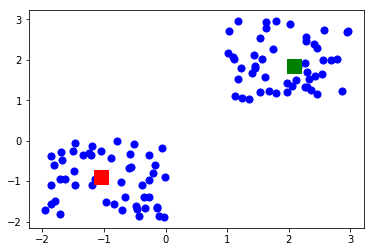

In [29]:
# 將中心點繪製於圖上
plt.scatter(X[ :, 0], X[ :, 1], s = 50, c = 'b')
plt.scatter(2.07708511,  1.84980314, s = 200, c = 'g', marker = 's')
plt.scatter(-1.05520904, -0.91008718, s = 200, c = 'r', marker = 's')

plt.show()

# 尋找最佳群數的方法

透過集群內誤差平方和（SSE）的資訊，來對一個集群使用一個稱為**轉折判斷法**的圖形工具，來估計最佳的集群數目 k

In [33]:
# 讀取集群內誤差平方和
Kmean.inertia_

69.03481474229625

## 利用轉折判斷法來找

In [34]:
from sklearn.datasets.samples_generator import make_blobs

In [35]:
X, y = make_blobs(n_samples = 150, n_features = 2, centers = 3, cluster_std = 0.5, shuffle = True, random_state = 0)

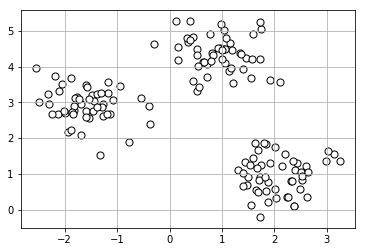

In [36]:
plt.scatter(X[:, 0], X[:, 1], c = 'white', marker = 'o', edgecolor = 'black', s = 50)
plt.grid()

plt.show()

In [37]:
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters = i,
                        init = 'k-means++',
                        n_init = 10,
                        max_iter = 300,
                        random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)

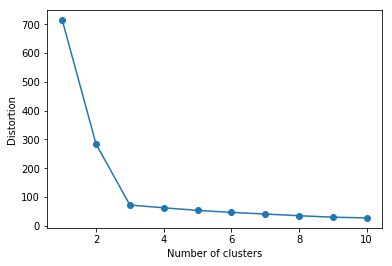

In [38]:
plt.plot(range(1, 11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

plt.show()

# DBSCAN

這種密度分群（Density-based Clustering）多是假設集群結構能夠透過樣本分佈的緊密程度來確定

其中 DBSCAN 是最常用的一種方法，原理是透過識別特徵空間的“擁擠”區域中的，在這些區域中許多資料點靠近在一起。這些區域被稱為特征空間的密集（dense）區域。集群成為資料的密集區域，並由相對較空的區域所分隔開

在 DBSCAN 中，密度的觀念被定義為：在指定的半徑 $\epsilon$ 之內，樣本的個數

優點是不需要先設置群的個數，可以劃分具有複雜形狀的群，還可找出不屬於任何群的點

但在運算上 DBSCAN 比先前介紹的幾種方式較慢，但對於相對較大的資料集還是可以使用

In [41]:
from sklearn.datasets import make_moons

In [42]:
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

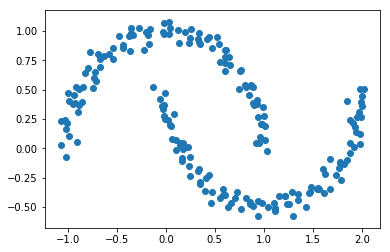

In [43]:
plt.scatter(X[:, 0], X[:, 1])

plt.show()

使用 K-means 和 Agglomerative Hierarchical Clustering

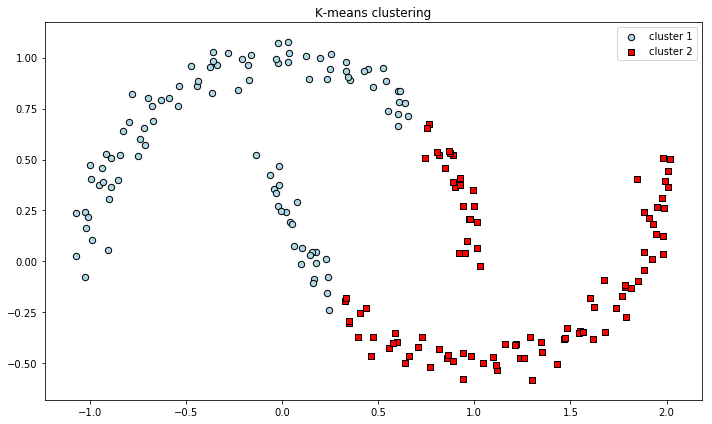

In [50]:
f, ax1 = plt.subplots(1, 1, figsize = (8, 5))

km = KMeans(n_clusters = 2, random_state = 0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], edgecolor = 'black', c = 'lightblue', marker = 'o', s = 40, label = 'cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], edgecolor = 'black', c = 'red', marker = 's', s = 40, label = 'cluster 2')
ax1.set_title('K-means clustering')



plt.legend()
plt.tight_layout()

plt.show()

In [51]:
from sklearn.cluster import DBSCAN

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

sklearn.cluster.DBSCAN(eps=0.5,min_samples=5,metric='euclidean',algorithm='auto',leaf_size=30,p=None,random_state=None)

重要參數：

- eps：  $\epsilon$ 參數，用於確定鄰域大小 
- min_samples：MinPts 參數，用於判斷核心對象
- algorithm：計算兩點間距離並找出最近鄰的點，參數有
                   auto：由算法自動選擇合適的算法
                   ball_tree：用 ball 樹來搜索
                   kd_tree：用 kd 樹搜索
                   brute：暴力搜索 
- leaf_size：用於指定當 algorithm=ball_tree 或 kd_tree 時，樹的葉節點大小               

屬性：

- core_sample_indices_：核心樣本在原始訓練集中的位置
- components_：核心樣本的一份副本
- labels_：每個資料點所屬的群標記。如果是雜訊資料點，則群標記會為-1副本

方法：

- fit(X[,y,sample_weight])：訓練模型
- fit_predict(X[,y,sample_weight])：訓練模型並預測每個資料點所屬的群標記

In [39]:
import mglearn

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


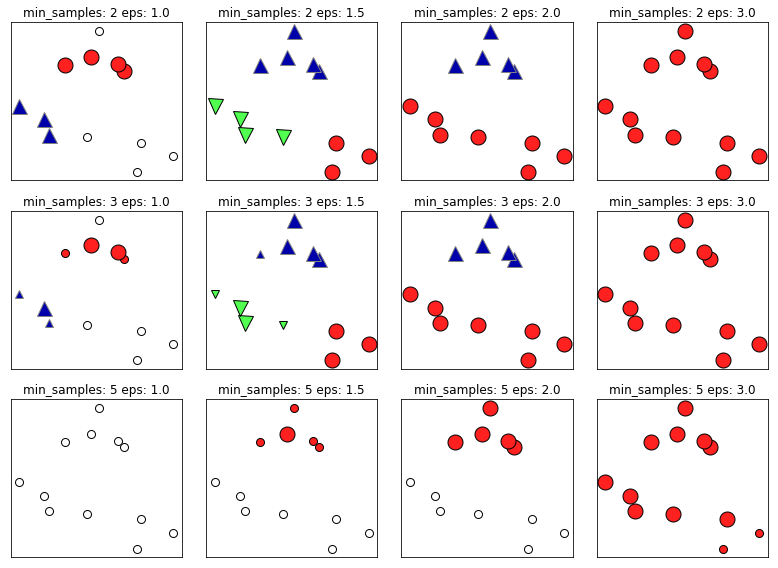

In [40]:
mglearn.plots.plot_dbscan()

上圖顯示由 DBSCAN 改變 min_samples 和 eps 參數的設置所找到的群分配

In [52]:
db = DBSCAN(eps = 0.2, min_samples = 5, metric = 'euclidean')
y_db = db.fit_predict(X)

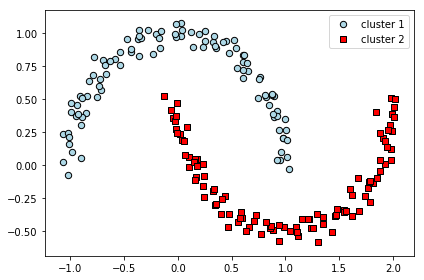

In [53]:
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c = 'lightblue', marker = 'o', s = 40, edgecolor = 'black', label = 'cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c = 'red', marker = 's', s = 40, edgecolor = 'black', label = 'cluster 2')
plt.legend()
plt.tight_layout()

plt.show()

另外的例子

In [54]:
from sklearn.datasets import make_blobs

In [55]:
# 隨機生成資料點
X, y = make_blobs(random_state = 170, n_samples = 600, centers = 5)
rng = np.random.RandomState(74)
transformation = rng.normal(size = (2, 2))
X = np.dot(X, transformation)

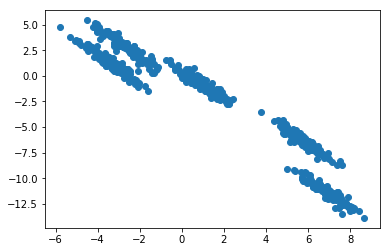

In [56]:
# 繪製成圖
plt.scatter(X[:, 0], X[:, 1])

plt.show()

In [57]:
# 使用 K-meas 算法
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
y_pred = kmeans.predict(X)

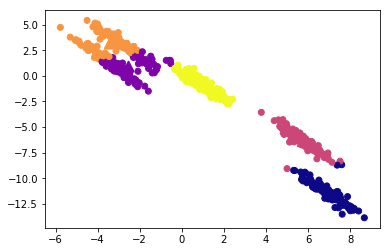

In [59]:
# 繪製分群結果
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'plasma')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = '^', c = [0, 1, 2, 3, 4],  s = 100,   linewidth = 2, cmap = 'plasma')

In [60]:
# 使用 DBSCAN 算法
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)

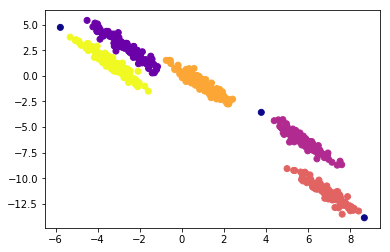

In [63]:
# 繪製分群結果
plt.scatter(X[:, 0], X[:, 1], c = clusters, cmap = 'plasma')